In [2]:
import os
import numpy as np
import random
from PIL import Image, ImageEnhance

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.utils import shuffle

In [3]:
train_dir = "/Users/subra/Downloads/braintumor/Training"
test_dir = "/Users/subra/Downloads/braintumor/Testing"

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir,label)):
        train_paths.append(os.path.join(train_dir,label,image))
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths,train_labels)

test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir,label)):
        test_paths.append(os.path.join(test_dir,label,image))
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths,test_labels)

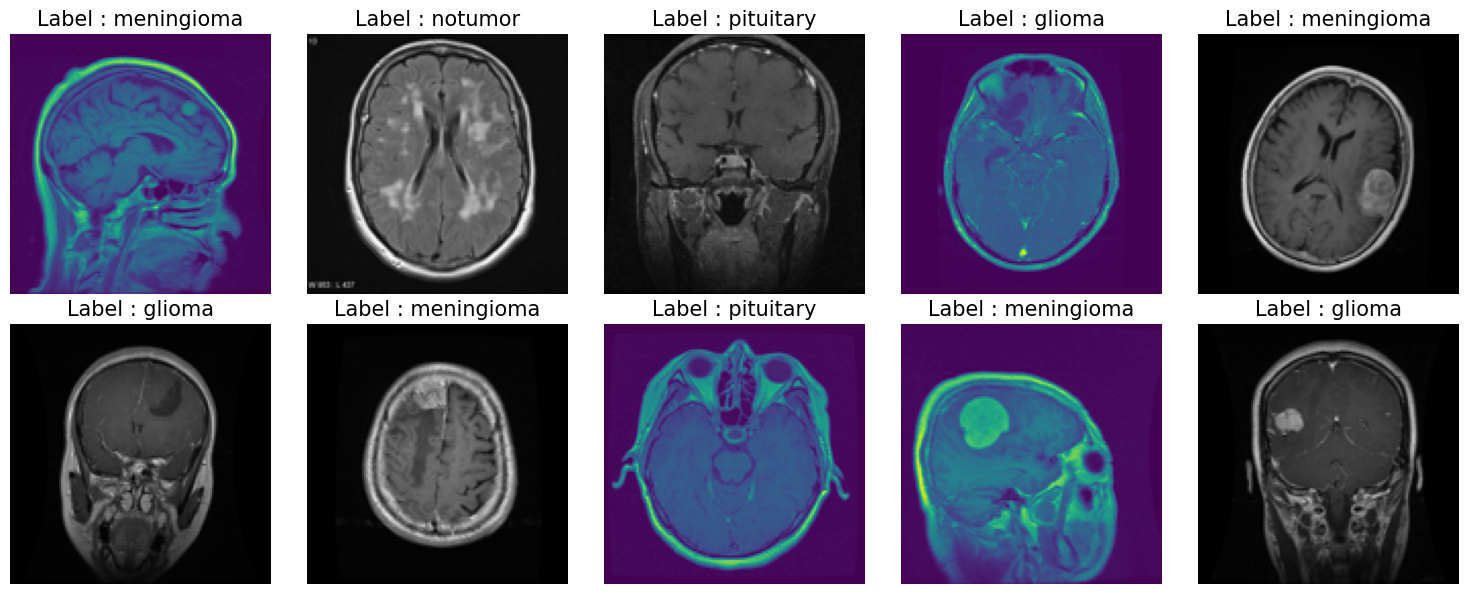

In [4]:
import matplotlib.pyplot as plt
import random
from PIL import Image
random_indices = random.sample(range(len(train_paths)), 10)
fig, axes = plt.subplots(2,5, figsize = (15,6))
axes = axes.ravel()
for i, idx in enumerate(random_indices):
    img_path = train_paths[idx]
    img = Image.open(img_path)
    img = img.resize((128,128))
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Label : {train_labels[idx]}",fontsize = 15)
plt.tight_layout()
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

def preprocess_images(image_paths, labels, image_size):
	images = []
	for path in image_paths:
		img = Image.open(path).convert('L')
		img = img.resize((image_size, image_size))
		images.append(np.array(img))
	images = np.array(images) / 255.0
	return images, np.array(labels)
IMAGE_SIZE =128
x_train, y_train = preprocess_images(train_paths, train_labels, IMAGE_SIZE)
x_test, y_test = preprocess_images(test_paths, test_labels, IMAGE_SIZE)

# Reshape x_train and x_test to 2D
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(x_train, y_train)

# Predict
y_pred = knn.predict(x_test)

# Print classification report and accuracy score
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

      glioma       0.85      0.95      0.90       300
  meningioma       0.93      0.69      0.79       306
     notumor       0.92      0.96      0.94       405
   pituitary       0.91      1.00      0.95       300

    accuracy                           0.90      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.90      0.90      0.90      1311

Accuracy Score: 0.9023646071700991


confusion Matrix:
[[285  11   0   4]
 [ 42 210  33  21]
 [  9   4 389   3]
 [  0   1   0 299]]


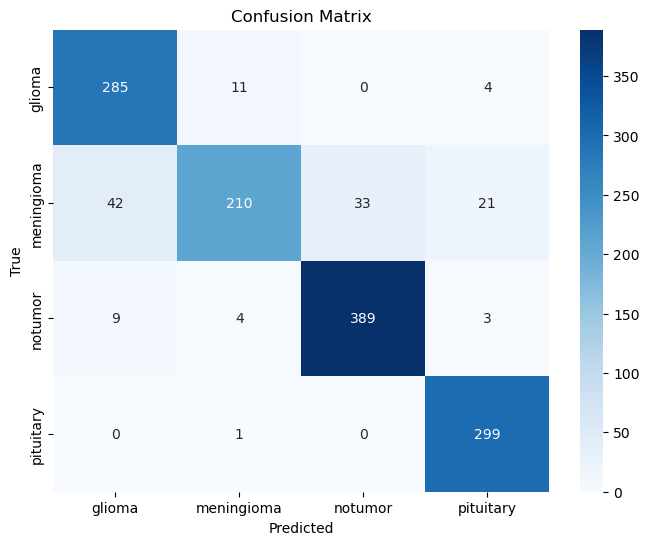

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm= confusion_matrix(y_test,y_pred)
print("confusion Matrix:")
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',xticklabels=os.listdir(train_dir),yticklabels=os.listdir(train_dir))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

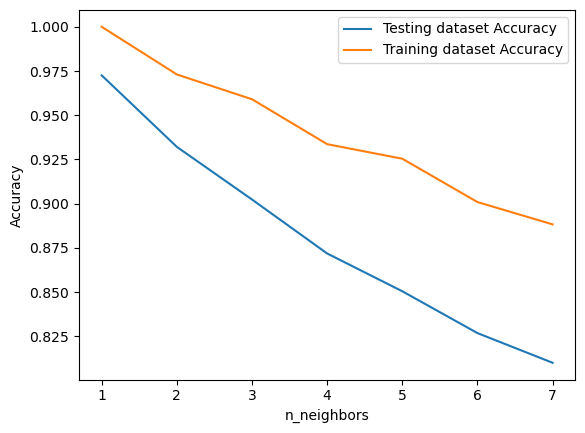

In [7]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target


neighbors = np.arange(1,8)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, n in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=n)
	knn.fit(x_train, y_train)
	train_accuracy[i] = knn.score(x_train, y_train)
	test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


In [8]:
print("Best K value:", neighbors[np.argmax(test_accuracy)])
print("Best Test Accuracy:", test_accuracy)
print("Best Train Accuracy:", train_accuracy)

Best K value: 1
Best Test Accuracy: [0.97254005 0.93211289 0.90236461 0.87185355 0.8504958  0.82684973
 0.81006865]
Best Train Accuracy: [1.         0.97303922 0.95903361 0.93364846 0.92542017 0.90091036
 0.88830532]


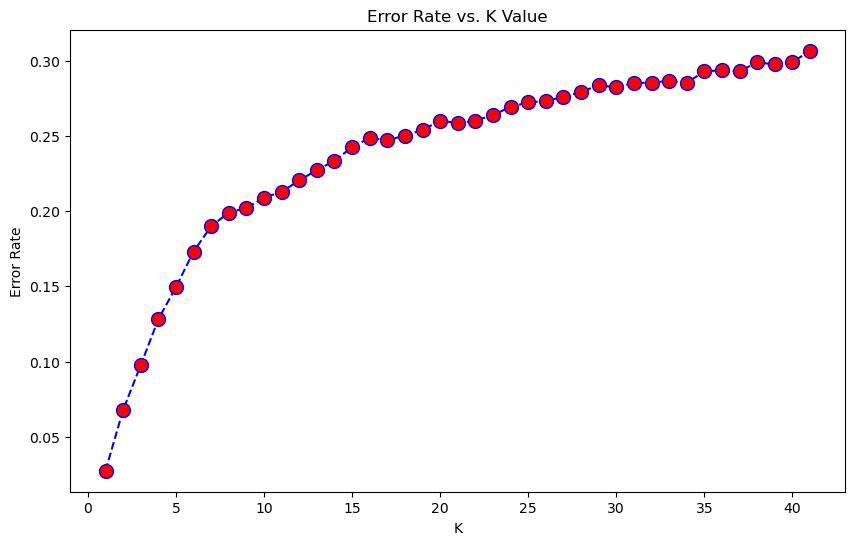

In [9]:
error_rate = []
for i in range(1, 42):

	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(x_train, y_train)
	pred_i = knn.predict(x_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 42), error_rate, color='blue',
		linestyle='dashed', marker='o',
		markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


Mean Squared Error: 0.12704466480210191
R-squared: 0.8908463013785369


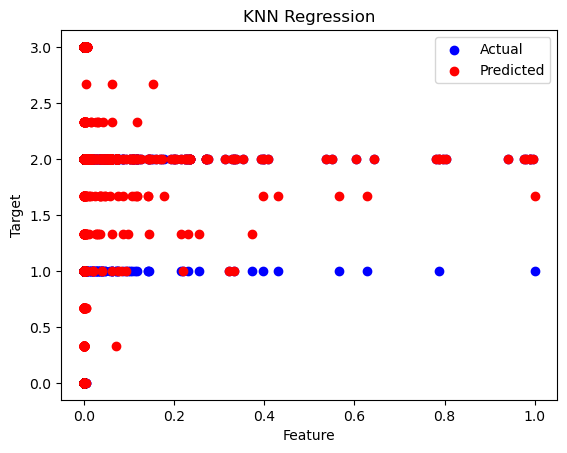

In [10]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode string labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

X, y = make_regression(n_samples=200, n_features=1, noise=0.1, random_state=42)

# Create and train the KNN regressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train_encoded)

# Make predictions on the test data
y_pred_encoded = knn.predict(x_test)

# Decode the predictions back to string labels
y_pred = label_encoder.inverse_transform(y_pred_encoded.astype(int))

# Evaluate the model
mse = mean_squared_error(y_test_encoded, y_pred_encoded)
r2 = r2_score(y_test_encoded, y_pred_encoded)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results
plt.scatter(x_test[:, 0], y_test_encoded, color='blue', label='Actual')
plt.scatter(x_test[:, 0], y_pred_encoded, color='red', label='Predicted')
plt.title('KNN Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


In [14]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [15]:
import joblib

joblib.dump(model, 'knn_brain_tumor_model.pkl')


['knn_brain_tumor_model.pkl']

In [17]:
loaded_model = joblib.load('knn_brain_tumor_model.pkl')
predictions = loaded_model.predict(x_test)
